In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import tensorflow as tf
import tensorflow.keras as keras
from os.path import join as ospj
import os
from datetime import datetime

SWARM_LEARNING = os.getenv('SLNUM') is not None

print("LISTDIR:::::",os.listdir('.'))
print("ENV:::::::::",os.getenv('DATA_DIR', './data'))
print("CUDA_VISIBLE:::::::::",os.getenv('CUDA_VISIBLE_DEVICES'))
print("DEV:::::::::",os.listdir('/dev'))

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
#        for gpu in gpus:
#            tf.config.experimental.set_virtual_device_configuration(gpu, [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
#        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        pass
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

DATA_DIR=os.getenv('DATA_DIR', './data')
DATA_ROOT=ospj(DATA_DIR, 'ruifeng')
BATCH_SIZE=32

data = None
with open(ospj(DATA_DIR, 'ruifeng_by_date.json'), 'r') as fp:
    data = json.load(fp)
print(data.keys())

/usr/local/python3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/python3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/python3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/python3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

LISTDIR::::: ['.ipynb_checkpoints', 'data_raw', 'saved_models', 'enetv2.h5', 'data_split.ipynb', 'keras_impl.ipynb', 'data', 'keras_impl.py', 'model', 'logs', 'densenet.py', 'train.py']
ENV::::::::: ./data
CUDA_VISIBLE::::::::: None
DEV::::::::: ['nvidia-modeset', 'nvidia-uvm-tools', 'i2c-6', 'i2c-5', 'nvidia1', 'i2c-4', 'i2c-3', 'kvm', 'nvidia0', 'nvidia-caps', 'nvidiactl', 'nvidia-uvm', 'vcsa2', 'vcs2', 'vcsa3', 'vcs3', 'vcsa5', 'vcs5', 'vcsa6', 'vcs6', 'vcsa4', 'vcs4', 'ipmi0', 'snd', 'vhost-vsock', 'vhost-net', 'uhid', 'vhci', 'vfio', 'userio', 'btrfs-control', 'cuse', 'log', 'mqueue', 'hugepages', 'initctl', 'shm', 'autofs', 'sdb1', 'disk', 'sda3', 'sda2', 'sda1', 'sdb', 'sda', 'sg1', 'bsg', 'sg0', 'ptp1', 'i2c-2', 'hidraw1', 'hidraw0', 'ptp0', 'i2c-1', 'fb0', 'i2c-0', 'dri', 'block', 'rtc', 'char', 'stderr', 'stdout', 'stdin', 'fd', 'core', 'pts', 'memory_bandwidth', 'network_throughput', 'network_latency', 'cpu_dma_latency', 'cpu', 'mcelog', 'mapper', 'rtc0', 'uinput', 'psaux', 

(258, 136, 3)


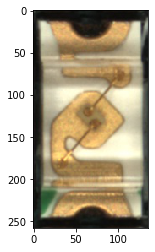

In [2]:
img=plt.imread(ospj(DATA_ROOT, data['train']['pos'][0][0]))
print(img.shape)
plt.imshow(img)

In [8]:
print('pos:', len(data['train']['pos']))
print('neg:', len(data['train']['neg']))

pos: 35878
neg: 9370


In [6]:
BILI=[1/3, 1/3, 1/3]
ZF=[None, None, None]

In [16]:
np.cumsum(BILI)

array([0.33333333, 0.66666667, 1.        ])

In [57]:
import copy
template = copy.deepcopy(data)

In [58]:
import json

In [59]:
# del template['val']
del template['train']

In [60]:
def split_data(pos, neg, bili, ratio, split_id):
    left=0
    right=0
    splt = np.cumsum(bili)[:-1]
    pos_arr = pos # np.array([x[0] for x in pos])
    neg_arr = neg # np.array([x[0] for x in neg])
    
    poss = np.split(pos_arr, np.around(splt*len(pos_arr)).astype(int))
    negs = np.split(neg_arr, np.around(splt*len(neg_arr)).astype(int))
    os.mkdir(ospj('data', split_id))
    for pos, neg, rat, num in zip(poss, negs, ratio, range(len(ratio))):
        os.mkdir(ospj('data/'+split_id, str(num+1)))
        template['train'] = {
            "pos": [[x, int(y)] for x,y in pos],
            "neg": [[x, int(y)] for x,y in neg]
        }
        with open('data/'+split_id+'/'+str(num+1)+'/ruifeng_by_date.json', 'w') as fp:
            json.dump(template, fp)

In [61]:
current = datetime.datetime.strftime(datetime.datetime.now(), '%Y%m%d-%H%M%S')
split_data(data['train']['pos'], data['train']['neg'], BILI, ZF, current)

In [29]:
len(lst[0][0])

11959

In [30]:
zip([1,2,3],[1,2,3],[4,5,6])

In [39]:
import datetime

In [42]:
time = datetime.datetime.now()